<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [412]:
 #Library of Functions for the OpenClassrooms Multivariate Exploratory Data Analysis Course

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x+0.01, y+0.01, labels[i], fontsize='8', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

In [413]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [414]:
#Importation du fichier final
df_final = pd.read_csv("final2.csv",sep=',',index_col='nom_fr')



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Vérification du fichier</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier df_final.csv</h3>
</div>

In [415]:
#Afficher les dimensions du dataset
dimensions=df_final.shape

print(f"Le dataset a {dimensions[0]} lignes et {dimensions[1]} colonnes.")

Le dataset a 161 lignes et 10 colonnes.


In [416]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dispo alimentaire  161 non-null    float64
 1   Export             161 non-null    float64
 2   Import             161 non-null    float64
 3   Production         161 non-null    float64
 4   Stabilité          161 non-null    float64
 5   distance_france    161 non-null    float64
 6   Restaurants        161 non-null    float64
 7   PIB_hab_PPA        161 non-null    float64
 8   evolution du pib   161 non-null    float64
 9   pop/1000           161 non-null    float64
dtypes: float64(10)
memory usage: 13.8+ KB


In [417]:
#Afficher les 5 premières lignes de la table
df_final.head(5)

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000
nom_fr,,,,,,,,,,
Afghanistan,1.53,0.000000,0.000799,0.000771,-2.794976,5596.702065,0.000000,2335.795862,-0.195570,36296.113
Afrique du Sud,35.69,0.001105,0.009016,0.029241,-0.284804,8980.612037,0.016752,13738.438585,0.498696,57009.756
Albanie,16.36,0.000000,0.013175,0.004507,0.373771,1603.327048,0.002774,12771.034440,3.898112,2884.169
Algérie,6.38,0.000000,0.000048,0.006644,-0.919614,1336.701248,0.000048,13493.560749,-0.541667,41389.189
Allemagne,19.47,0.007815,0.010187,0.018316,0.574381,660.545159,0.002287,54110.253665,2.332866,82658.409


In [418]:
import textwrap

# Obtenir la liste triée des pays uniques depuis l'index du DataFrame
liste_pays_etude = sorted(df_final.index.unique().tolist())

# Créer une chaîne de caractères avec les pays séparés par des virgules et un espace
texte_pays = ', '.join(liste_pays_etude)

# Formater le texte pour qu'il ne dépasse pas 80 caractères par ligne (modifiable)
texte_formate = textwrap.fill(texte_pays, width=80)

print("Les 161 pays de l'étude :\n")
print(texte_formate)


Les 161 pays de l'étude :

Afghanistan, Afrique du Sud, Albanie, Algérie, Allemagne, Angola, Antigua-et-
Barbuda, Arabie Saoudite, Argentine, Arménie, Australie, Autriche, Azerbaïdjan,
Bahamas, Bangladesh, Barbade, Belgique, Belize, Bolivie, Bosnie-Herzégovine,
Botswana, Brésil, Bulgarie, Burkina Faso, Bélarus, Bénin, Cambodge, Cameroun,
Canada, Cap-vert, Chili, Chine, Chypre, Colombie, Costa Rica, Croatie, Côte
d'Ivoire, Danemark, Djibouti, Dominique, El Salvador, Espagne, Estonie, Fidji,
Finlande, France, Fédération de Russie, Gabon, Gambie, Ghana, Grenade, Grèce,
Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hong-Kong,
Hongrie, Inde, Indonésie, Iraq, Irlande, Islande, Israël, Italie, Jamaïque,
Japon, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Koweït, L'ex-
République Yougoslave de Macédoine, Lesotho, Lettonie, Liban, Libéria, Lituanie,
Luxembourg, Macao, Madagascar, Malaisie, Malawi, Maldives, Mali, Malte, Maroc,
Maurice, Mauritanie, Mexique, Mongolie

In [419]:
nb_pays = len(liste_pays_etude)
print(nb_pays)

161


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - ACP</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">préparation des données</h3>
</div>

In [420]:
#préparation des données:

# Sélectionner les colonnes numériques pour l'ACP
x=df_final[['dispo alimentaire',
       'Export', 'Import', 'Production',
       'Stabilité', 'distance_france',
       'Restaurants', 'PIB_hab_PPA', 'evolution du pib','pop/1000']]

x.head()


,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000
nom_fr,,,,,,,,,,
Afghanistan,1.53,0.000000,0.000799,0.000771,-2.794976,5596.702065,0.000000,2335.795862,-0.195570,36296.113
Afrique du Sud,35.69,0.001105,0.009016,0.029241,-0.284804,8980.612037,0.016752,13738.438585,0.498696,57009.756
Albanie,16.36,0.000000,0.013175,0.004507,0.373771,1603.327048,0.002774,12771.034440,3.898112,2884.169
Algérie,6.38,0.000000,0.000048,0.006644,-0.919614,1336.701248,0.000048,13493.560749,-0.541667,41389.189
Allemagne,19.47,0.007815,0.010187,0.018316,0.574381,660.545159,0.002287,54110.253665,2.332866,82658.409


In [421]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, Afghanistan to Îles Salomon
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dispo alimentaire  161 non-null    float64
 1   Export             161 non-null    float64
 2   Import             161 non-null    float64
 3   Production         161 non-null    float64
 4   Stabilité          161 non-null    float64
 5   distance_france    161 non-null    float64
 6   Restaurants        161 non-null    float64
 7   PIB_hab_PPA        161 non-null    float64
 8   evolution du pib   161 non-null    float64
 9   pop/1000           161 non-null    float64
dtypes: float64(10)
memory usage: 17.9+ KB


In [422]:
x.describe()

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02
mean,20.208199,0.003653,0.010671,0.016412,-0.056513,5893.341837,0.002459,20601.018125,2.252530,4.484592e+04
std,15.987588,0.011502,0.018735,0.017630,0.877090,3787.632284,0.005123,20826.491840,2.997332,1.580096e+05
min,0.130000,0.000000,0.000000,0.000000,-2.794976,1.779893,0.000000,883.810735,-8.168790,5.204500e+01
25%,6.380000,0.000000,0.000318,0.002060,-0.629498,2954.902800,0.000000,4996.894728,1.019431,2.920848e+03
50%,17.980000,0.000000,0.003419,0.009602,-0.039427,5568.811261,0.000113,13575.431977,2.332866,9.729823e+03
75%,29.950000,0.001708,0.011564,0.026212,0.642371,8669.461392,0.002109,29578.631163,3.947882,3.195978e+04
max,72.310000,0.090743,0.124139,0.076299,1.561946,19241.936844,0.026561,120983.492894,10.554796,1.421022e+06


In [423]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.17193895, -0.31857977, -0.52859541, ..., -0.87975509,
        -0.81930797, -0.05427823],
       [ 0.9713852 , -0.22220678, -0.08862507, ..., -0.33054015,
        -0.58695744,  0.0772218 ],
       [-0.24145016, -0.31857977,  0.1340835 , ..., -0.37713573,
         0.55072857, -0.2663931 ],
       ...,
       [ 2.2256314 ,  0.67186221, -0.55111704, ...,  1.91319686,
        -0.14760793,  1.77908902],
       [-1.25978011, -0.31857977, -0.5708728 , ..., -0.89570022,
         1.46120381,  0.390774  ],
       [-0.9887274 , -0.31857977, -0.06627679, ..., -0.87405959,
        -0.89650336, -0.28066529]], shape=(161, 10))

<Axes: ylabel='Density'>

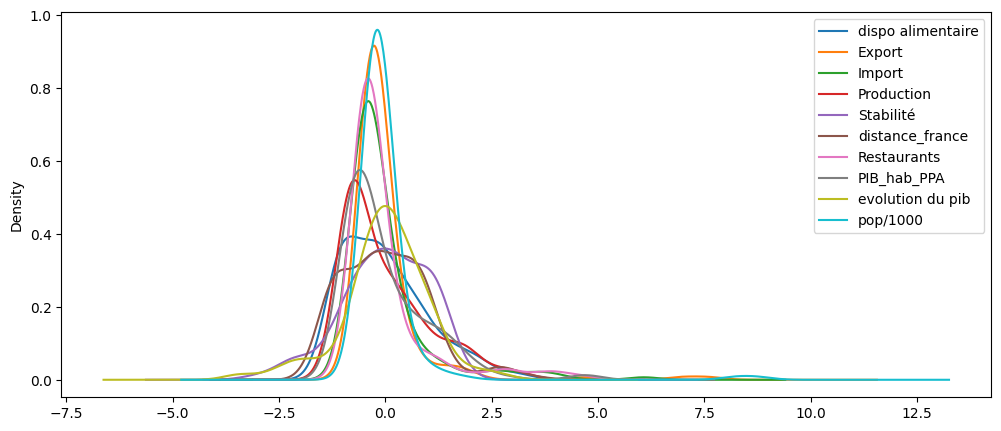

In [424]:
pd.DataFrame(X_scaled,columns=x.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))


<Axes: ylabel='Density'>

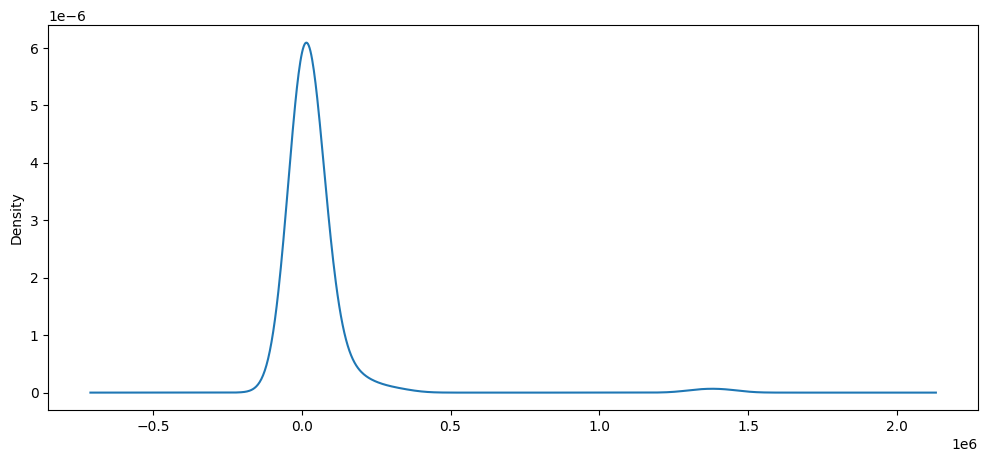

In [425]:
X2 = pd.DataFrame(x,columns=x.columns)['pop/1000']
X2.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))



<Axes: ylabel='Density'>

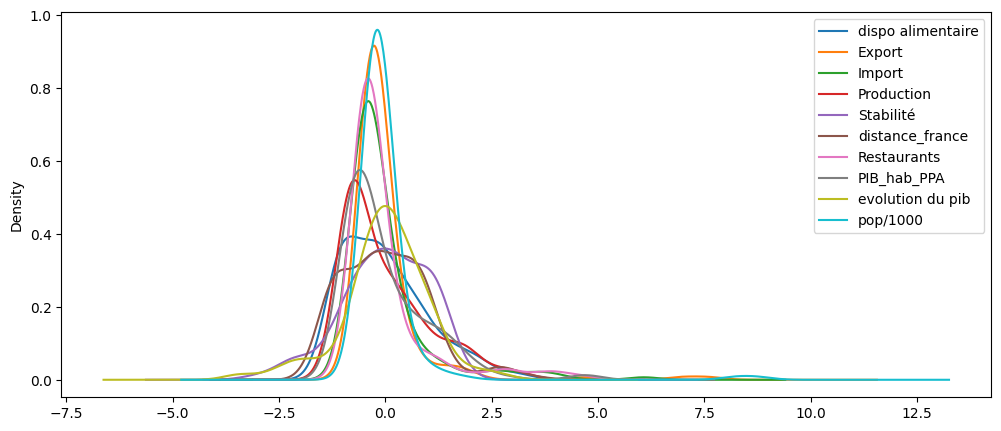

In [426]:
pd.DataFrame(X_scaled,columns=x.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))


In [427]:
#Perform PCA

In [428]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)


PCA(n_components=10)

In [429]:
#Analyse the results

In [430]:
pca.explained_variance_ratio_


array([0.29274791, 0.14468068, 0.13359127, 0.10558982, 0.09563562,
       0.08047311, 0.06561156, 0.04812744, 0.03069465, 0.00284794])

In [431]:


pca.explained_variance_ratio_.cumsum()




array([0.29274791, 0.43742859, 0.57101986, 0.67660968, 0.7722453 ,
       0.85271841, 0.91832997, 0.96645741, 0.99715206, 1.        ])

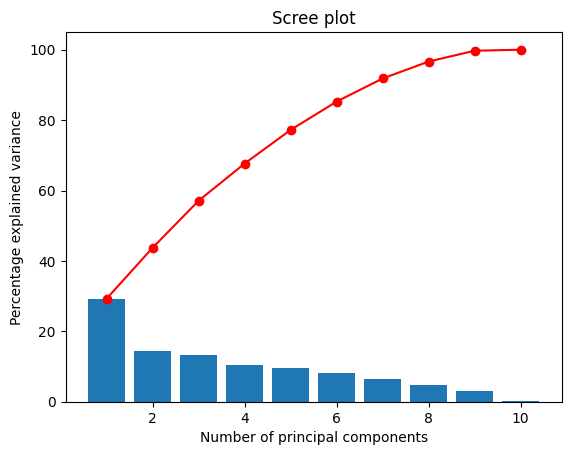

In [432]:


display_scree_plot(pca) 



In [433]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [434]:
x.columns

Index(['dispo alimentaire', 'Export', 'Import', 'Production', 'Stabilité',
       'distance_france', 'Restaurants', 'PIB_hab_PPA', 'evolution du pib',
       'pop/1000'],
      dtype='object')

In [435]:
pc1

array([ 0.46175257,  0.31479585,  0.32273442,  0.33955414,  0.42843053,
       -0.03210557,  0.27065987,  0.44923853, -0.00161505, -0.09260398])

In [436]:
pc2 = pca.components_[1]
pc2

array([ 0.0900242 ,  0.07516318,  0.599204  , -0.46390729,  0.07012068,
        0.03475274, -0.43223922, -0.10023722, -0.30531017, -0.3402551 ])

In [437]:
pcs = pca.components_
pcs

array([[ 4.61752567e-01,  3.14795851e-01,  3.22734423e-01,
         3.39554136e-01,  4.28430534e-01, -3.21055727e-02,
         2.70659866e-01,  4.49238533e-01, -1.61504563e-03,
        -9.26039845e-02],
       [ 9.00242022e-02,  7.51631813e-02,  5.99203996e-01,
        -4.63907292e-01,  7.01206799e-02,  3.47527420e-02,
        -4.32239217e-01, -1.00237223e-01, -3.05310168e-01,
        -3.40255098e-01],
       [ 3.01746411e-01, -3.81549074e-01,  1.05213107e-03,
         1.29503992e-01,  3.01059996e-02,  6.98372883e-01,
         2.41751170e-01, -2.69161440e-01, -3.56343152e-01,
        -9.69594521e-03],
       [ 8.88969164e-03,  1.79350615e-02,  2.80626698e-01,
        -2.66189605e-01,  2.18139264e-01,  3.77242764e-01,
        -9.62884335e-02, -3.04679110e-02,  5.93004926e-01,
         5.46113191e-01],
       [ 1.86488905e-01,  4.50810485e-01,  1.37958611e-01,
         2.89676491e-01, -4.30938117e-01, -1.38687927e-02,
        -2.27644421e-01, -1.69089862e-01, -3.24002252e-01,
         5.

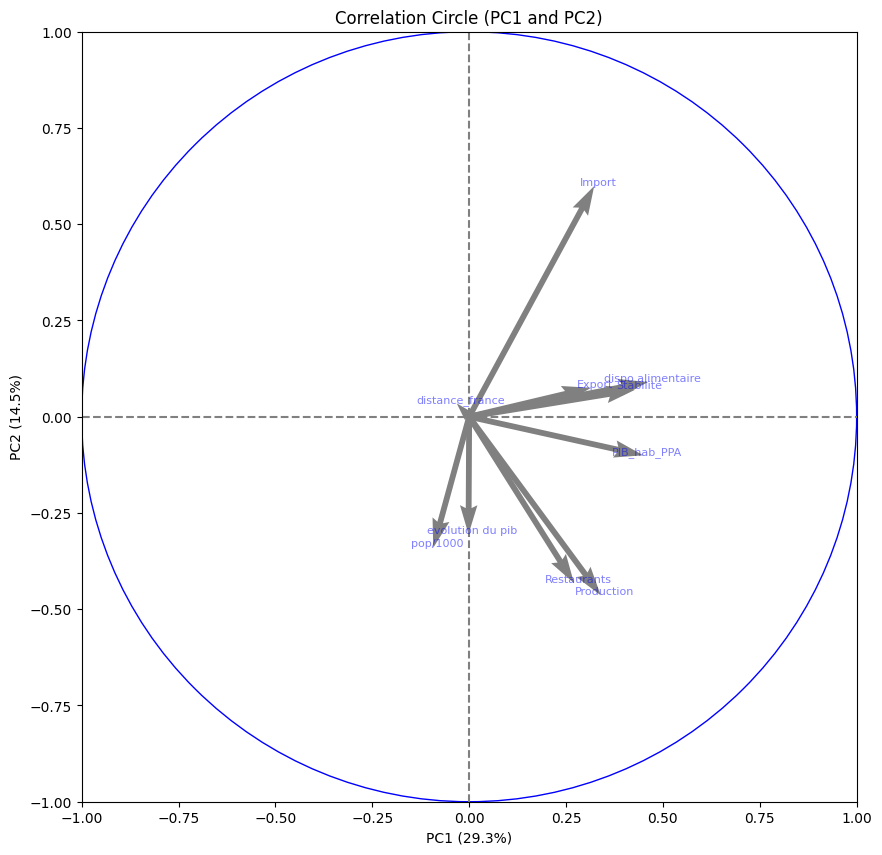

In [438]:


# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(x.columns),) 



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Kmean pour analyse</h2>
</div>

In [439]:
#Individuals Factor Map



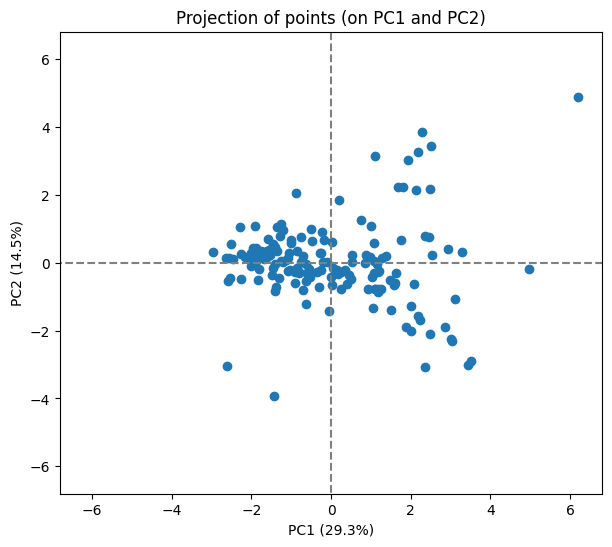

In [440]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

In [441]:
# Import the kmeans algorithmx
from sklearn.cluster import KMeans
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

In [442]:
x.head()

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000
nom_fr,,,,,,,,,,
Afghanistan,1.53,0.000000,0.000799,0.000771,-2.794976,5596.702065,0.000000,2335.795862,-0.195570,36296.113
Afrique du Sud,35.69,0.001105,0.009016,0.029241,-0.284804,8980.612037,0.016752,13738.438585,0.498696,57009.756
Albanie,16.36,0.000000,0.013175,0.004507,0.373771,1603.327048,0.002774,12771.034440,3.898112,2884.169
Algérie,6.38,0.000000,0.000048,0.006644,-0.919614,1336.701248,0.000048,13493.560749,-0.541667,41389.189
Allemagne,19.47,0.007815,0.010187,0.018316,0.574381,660.545159,0.002287,54110.253665,2.332866,82658.409


In [443]:


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled


array([[-1.17193895, -0.31857977, -0.52859541, ..., -0.87975509,
        -0.81930797, -0.05427823],
       [ 0.9713852 , -0.22220678, -0.08862507, ..., -0.33054015,
        -0.58695744,  0.0772218 ],
       [-0.24145016, -0.31857977,  0.1340835 , ..., -0.37713573,
         0.55072857, -0.2663931 ],
       ...,
       [ 2.2256314 ,  0.67186221, -0.55111704, ...,  1.91319686,
        -0.14760793,  1.77908902],
       [-1.25978011, -0.31857977, -0.5708728 , ..., -0.89570022,
         1.46120381,  0.390774  ],
       [-0.9887274 , -0.31857977, -0.06627679, ..., -0.87405959,
        -0.89650336, -0.28066529]], shape=(161, 10))

In [444]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)


In [445]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=x.columns, index=x.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()


,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000,cluster
nom_fr,,,,,,,,,,,
Afghanistan,-1.171939,-0.318580,-0.528595,-0.889936,-3.131956,-0.078562,-0.481464,-0.879755,-0.819308,-0.054278,0
Afrique du Sud,0.971385,-0.222207,-0.088625,0.729947,-0.261094,0.817636,2.798807,-0.330540,-0.586957,0.077222,2
Albanie,-0.241450,-0.318580,0.134084,-0.677363,0.492112,-1.136172,0.061692,-0.377136,0.550729,-0.266393,0
Algérie,-0.867632,-0.318580,-0.568789,-0.555775,-0.987121,-1.206785,-0.472002,-0.342335,-0.935137,-0.021945,0
Allemagne,-0.046317,0.362989,-0.025952,0.108362,0.721549,-1.385859,-0.033720,1.613992,0.026886,0.240052,2


methode github open classroom

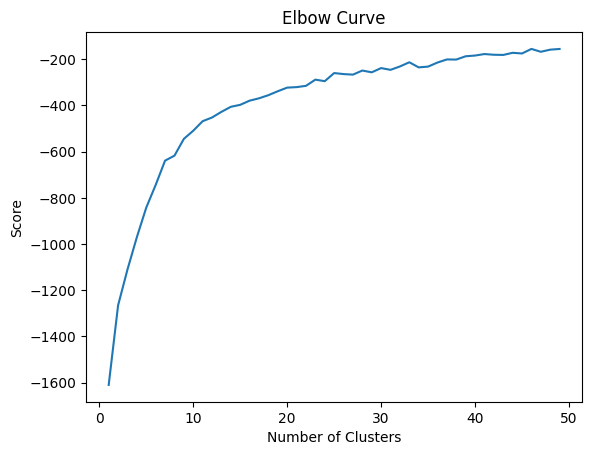

In [446]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


ma methode du coude

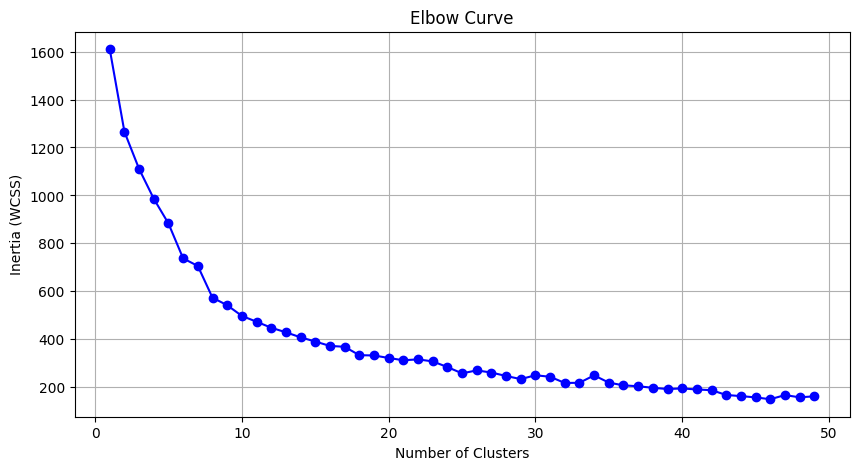

In [447]:
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10, random_state=42) for i in range(1, num_clusters)]
inertias = [kmeans_tests[i].fit(X_scaled).inertia_ for i in range(len(kmeans_tests))]

plt.figure(figsize=(10,5))
plt.plot(range(1, num_clusters), inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

methode cours Réalisez une analyse exploratoire de données

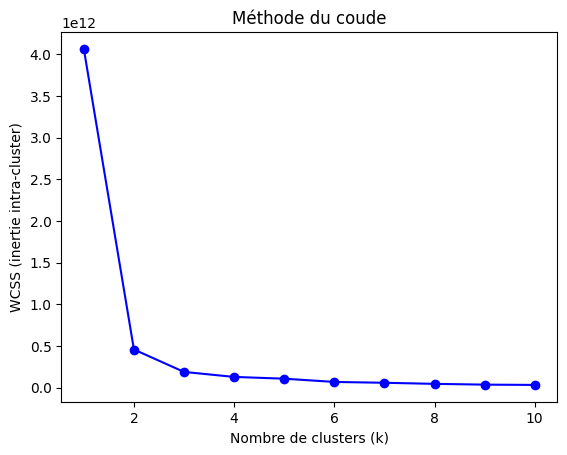

In [448]:
wcss = []
K = range(1, 11)  # On teste de 1 à 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)  # X = ton jeu de données (numpy array ou DataFrame)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(K, wcss, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS (inertie intra-cluster)')
plt.title('Méthode du coude')
plt.show()


In [449]:
 
X_for_clustering = X_scaled_clustered.drop(columns=['cluster'])


In [450]:
# Fit KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_for_clustering)

# Fit PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_for_clustering)


PCA(n_components=2)

In [451]:

from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled_clustered)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled_clustered)



In [452]:


# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced , index=x.index, columns=['PC1','PC2'])
X_reduceddf['clusters'] = clusters
X_reduceddf.head()




,PC1,PC2,clusters
nom_fr,,,
Afghanistan,-3.013698,-0.033084,0
Afrique du Sud,1.521645,-1.221166,2
Albanie,-0.584151,0.287064,0
Algérie,-1.671553,-0.003012,0
Allemagne,1.643385,-0.447086,2


In [453]:
print(x.shape)

(161, 10)


In [454]:
print(kmeans.cluster_centers_.shape)

(10, 10)


In [455]:
# Réinitialisation de l’index
X_reset = x.reset_index(drop=True)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reset)

# PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [456]:
centres_reduced = pca.transform(kmeans.cluster_centers_)


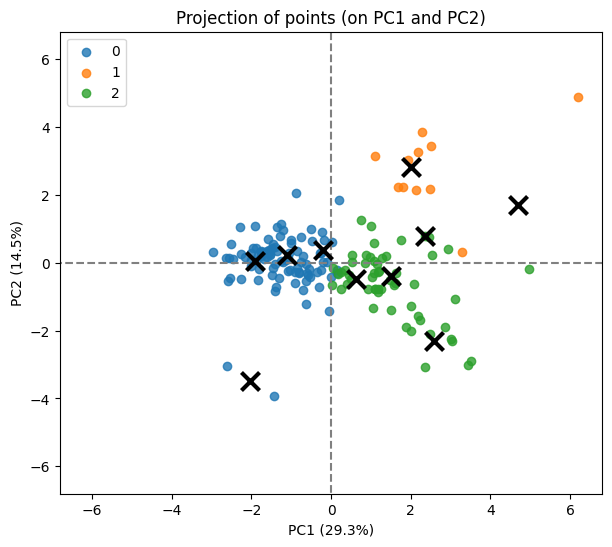

In [457]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

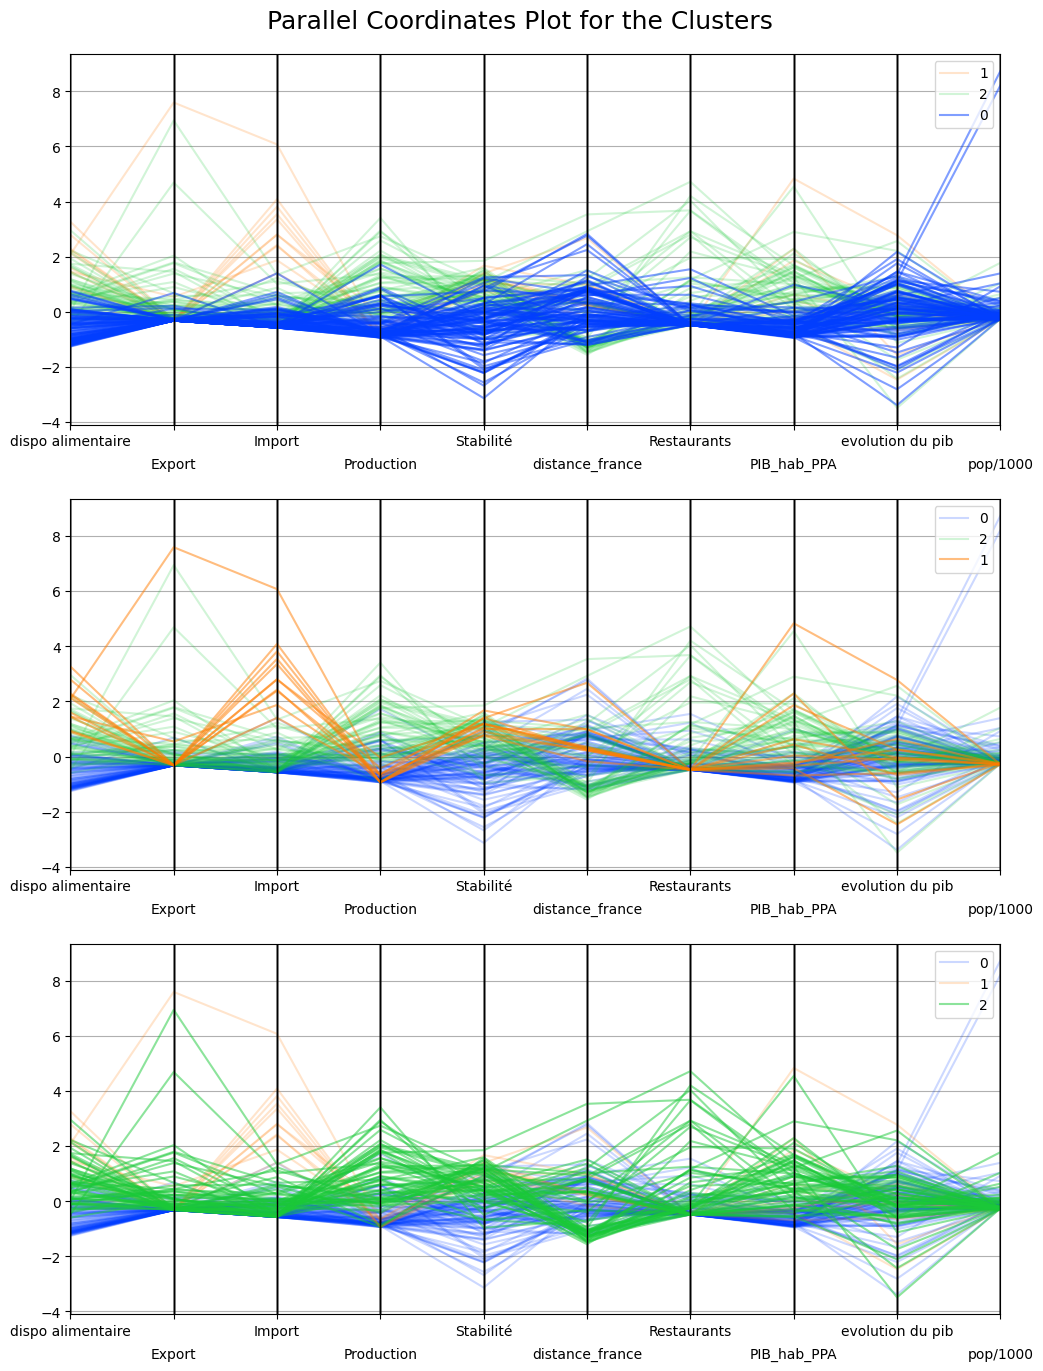

In [459]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=x.index, columns=x.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 3)

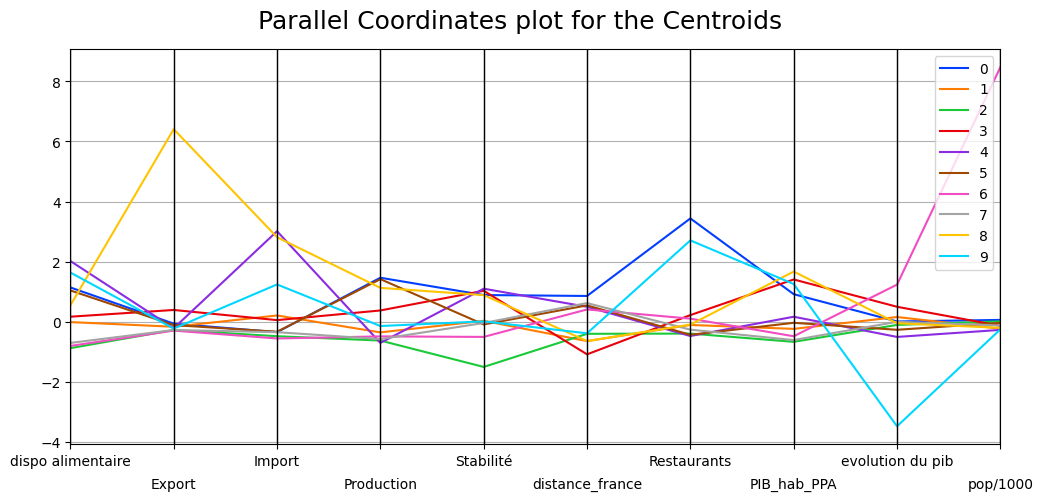

In [460]:


# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 3)



In [461]:
centroids

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000,cluster
0,1.137238,-0.068949,-0.352268,1.460717,0.883931,0.853204,3.436433,0.913070,0.002721,0.055290,0
1,-0.017063,-0.172670,0.203483,-0.360197,0.025402,-0.650309,-0.112332,-0.242998,0.152032,-0.237302,1
2,-0.885268,-0.279986,-0.487644,-0.632264,-1.511146,-0.407803,-0.400004,-0.674541,-0.111430,0.006626,2
3,0.162402,0.386563,0.048595,0.370503,1.026261,-1.092100,0.215643,1.402914,0.492791,-0.141713,3
4,2.016834,-0.222571,3.010488,-0.710519,1.095458,0.492199,-0.481464,0.160919,-0.511561,-0.277166,4
5,1.037266,-0.115983,-0.338643,1.414208,-0.095855,0.539839,-0.440474,-0.041017,-0.273610,-0.041402,5
6,-0.811477,-0.300775,-0.562860,-0.493395,-0.511019,0.404144,0.097255,-0.489048,1.231253,8.475234,6
7,-0.711163,-0.281593,-0.352901,-0.583674,-0.046924,0.616899,-0.269147,-0.616309,-0.007441,-0.130240,7
8,0.540964,6.410939,2.810036,1.123152,0.881586,-0.648190,-0.100449,1.665750,-0.055345,-0.209056,8
9,1.633958,-0.232576,1.237135,-0.148254,0.006043,-0.391274,2.704867,1.250597,-3.487714,-0.258953,9


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Hierarchical Clustering</h2>
</div>

In [462]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering


In [463]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(metric='euclidean', linkage='ward', compute_full_tree=True)

In [464]:
# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # count of data points in each cluster


array([73, 86,  2])

In [465]:
# Read off 5 clusters:
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters)

array([51, 19,  2,  3, 86])

In [466]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=x.columns, index=x.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered


,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000,cluster
nom_fr,,,,,,,,,,,
Afghanistan,-1.171939,-0.318580,-0.528595,-0.889936,-3.131956,-0.078562,-0.481464,-0.879755,-0.819308,-0.054278,4
Afrique du Sud,0.971385,-0.222207,-0.088625,0.729947,-0.261094,0.817636,2.798807,-0.330540,-0.586957,0.077222,0
Albanie,-0.241450,-0.318580,0.134084,-0.677363,0.492112,-1.136172,0.061692,-0.377136,0.550729,-0.266393,4
Algérie,-0.867632,-0.318580,-0.568789,-0.555775,-0.987121,-1.206785,-0.472002,-0.342335,-0.935137,-0.021945,4
Allemagne,-0.046317,0.362989,-0.025952,0.108362,0.721549,-1.385859,-0.033720,1.613992,0.026886,0.240052,0
...,...,...,...,...,...,...,...,...,...,...,...
Émirats Arabes Unis,1.459531,0.545500,1.872386,-0.645950,0.753078,-0.170627,-0.481464,2.285082,-1.561035,-0.224474,1
Équateur,-0.056356,-0.318580,-0.571376,0.218713,-0.025640,0.917850,-0.481464,-0.424220,0.705963,-0.178142,4
États-Unis,2.225631,0.671862,-0.551117,2.901774,0.364439,0.032375,1.965338,1.913197,-0.147608,1.779089,0


In [467]:
# Find the size of the clusters
X_scaled_clustered["cluster"].value_counts()


cluster
4    86
0    51
1    19
3     3
2     2
Name: count, dtype: int64

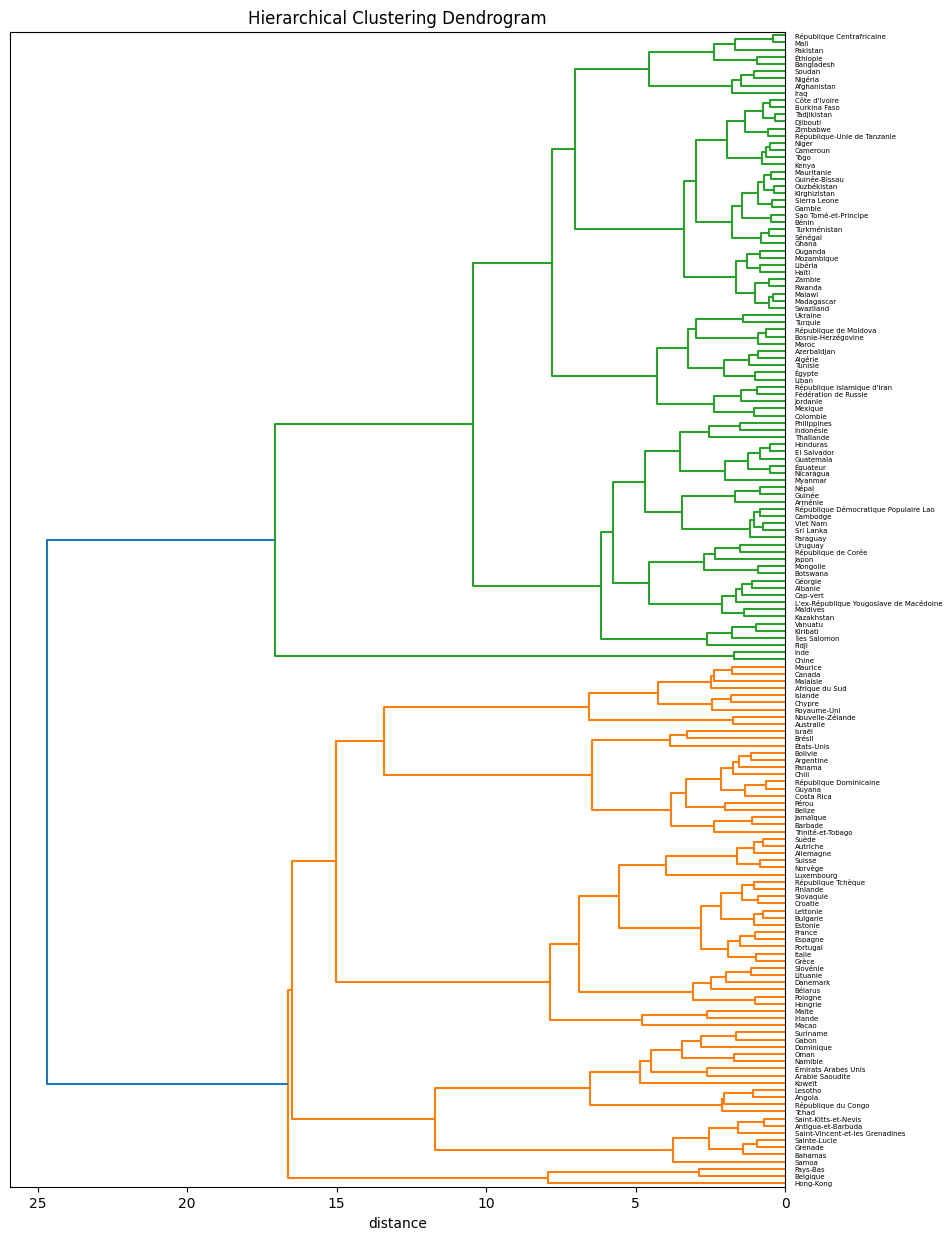

In [468]:
# Show a dendrogram, just for the first smallest cluster a changer pour prendre en compte l'ensemble du cluster
from scipy.cluster.hierarchy import linkage, fcluster 
#sample = X_scaled_clustered[X_scaled_clustered.cluster==1]#pas besoin de sample je veux l'ensemble
sample = X_scaled_clustered.drop('cluster', axis=1)
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))

In [469]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)



In [470]:
X_reduceddf = pd.DataFrame(X_reduced, index=x.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()


,PC1,PC2,cluster
nom_fr,,,
Afghanistan,-2.972697,0.309221,4
Afrique du Sud,1.062563,-1.334572,0
Albanie,-0.280139,0.277553,4
Algérie,-1.535370,0.235104,4
Allemagne,1.168594,-0.277368,0


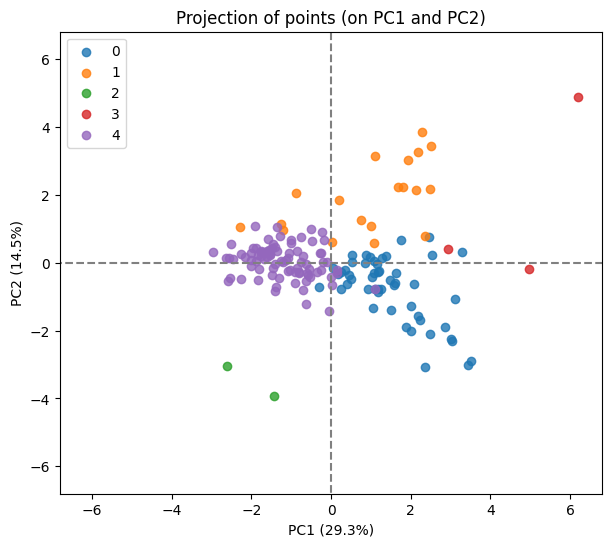

In [471]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)


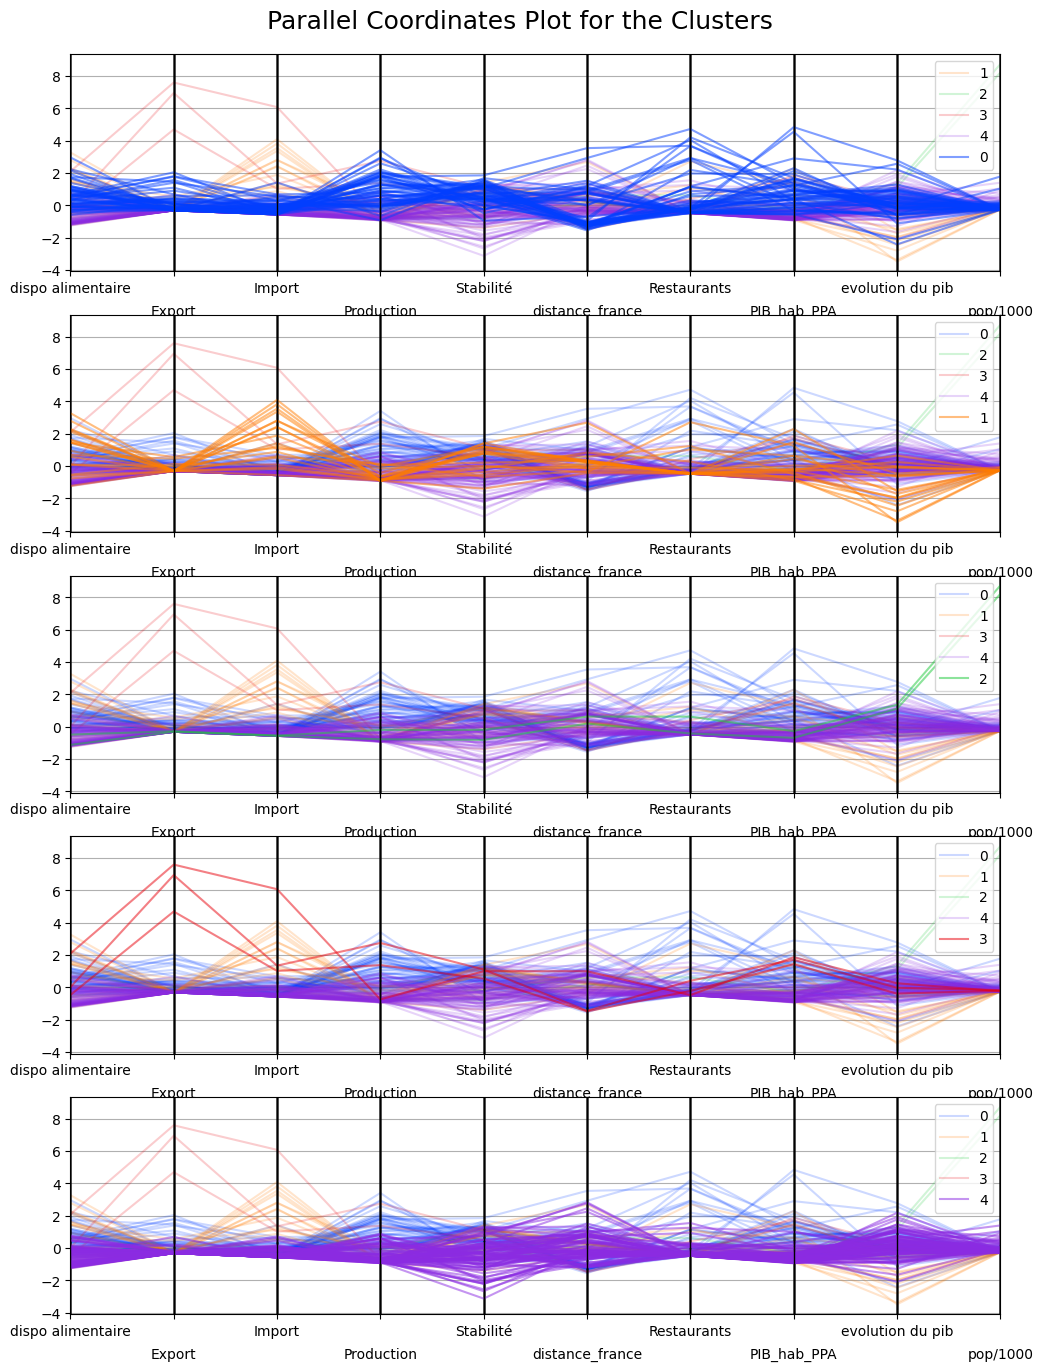

In [472]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=x.index, columns=x.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 5)


In [473]:
means =  X_clustered.groupby(by="cluster").mean()

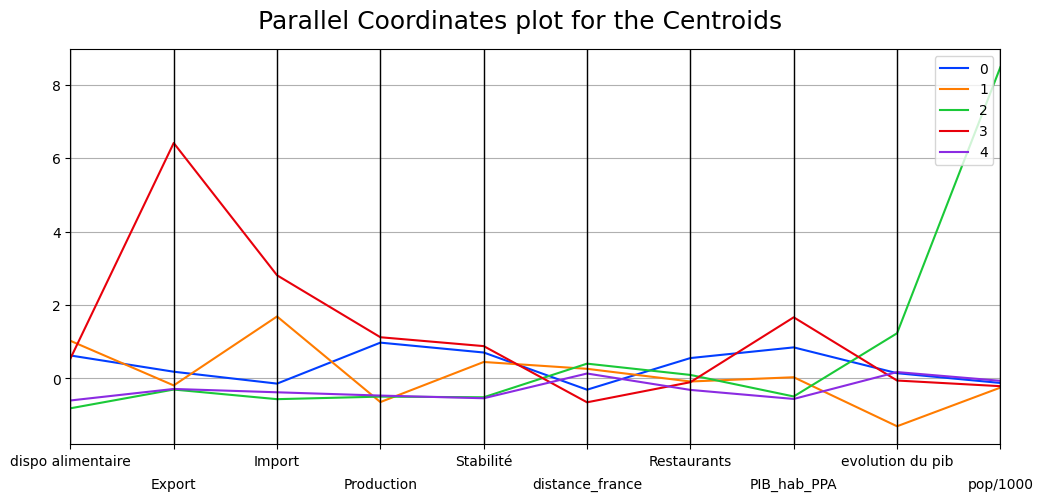

In [474]:
display_parallel_coordinates_centroids(means.reset_index(), 5)

In [475]:
means

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000
cluster,,,,,,,,,,
0,0.626812,0.184729,-0.139352,0.976361,0.707612,-0.304822,0.556344,0.847126,0.144492,-0.121178
1,1.026501,-0.188297,1.688631,-0.642096,0.449520,0.263528,-0.081666,0.033870,-1.300409,-0.248089
2,-0.811477,-0.300775,-0.562860,-0.493395,-0.511019,0.404144,0.097255,-0.489048,1.231253,8.475234
3,0.540964,6.410939,2.810036,1.123152,0.881586,-0.648190,-0.100449,1.665750,-0.055345,-0.209056
4,-0.598498,-0.284591,-0.375365,-0.464852,-0.537812,0.135758,-0.310640,-0.556583,0.174909,-0.063134


array([[<Axes: title={'center': 'Export'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Import'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'PIB_hab_PPA'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Production'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Restaurants'}, xlabel='[cluster]'>],
       [<Axes: title={'center': 'Stabilité'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'dispo alimentaire'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'distance_france'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'evolution du pib'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'pop/1000'}, xlabel='[cluster]'>]],
      dtype=object)

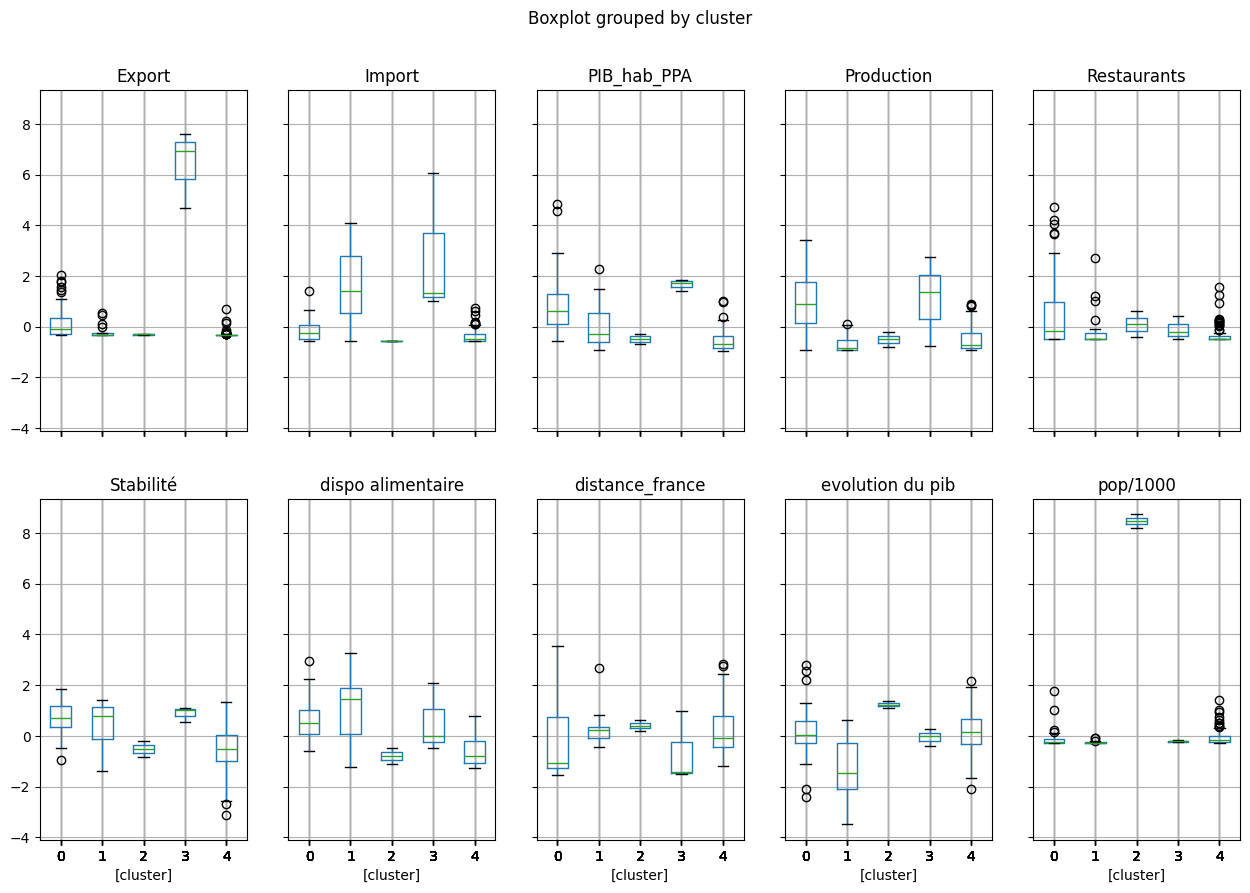

In [476]:
X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Liste des pays des clusters</h3>
</div>

In [477]:
X_clustered

,dispo alimentaire,Export,Import,Production,Stabilité,distance_france,Restaurants,PIB_hab_PPA,evolution du pib,pop/1000,cluster
nom_fr,,,,,,,,,,,
Afghanistan,-1.171939,-0.318580,-0.528595,-0.889936,-3.131956,-0.078562,-0.481464,-0.879755,-0.819308,-0.054278,4
Afrique du Sud,0.971385,-0.222207,-0.088625,0.729947,-0.261094,0.817636,2.798807,-0.330540,-0.586957,0.077222,0
Albanie,-0.241450,-0.318580,0.134084,-0.677363,0.492112,-1.136172,0.061692,-0.377136,0.550729,-0.266393,4
Algérie,-0.867632,-0.318580,-0.568789,-0.555775,-0.987121,-1.206785,-0.472002,-0.342335,-0.935137,-0.021945,4
Allemagne,-0.046317,0.362989,-0.025952,0.108362,0.721549,-1.385859,-0.033720,1.613992,0.026886,0.240052,0
...,...,...,...,...,...,...,...,...,...,...,...
Émirats Arabes Unis,1.459531,0.545500,1.872386,-0.645950,0.753078,-0.170627,-0.481464,2.285082,-1.561035,-0.224474,1
Équateur,-0.056356,-0.318580,-0.571376,0.218713,-0.025640,0.917850,-0.481464,-0.424220,0.705963,-0.178142,4
États-Unis,2.225631,0.671862,-0.551117,2.901774,0.364439,0.032375,1.965338,1.913197,-0.147608,1.779089,0


In [478]:
X_reset = X_clustered.reset_index()

In [479]:
import shutil
# Groupement par cluster et récupération des noms de pays
clusters = X_reset.groupby('cluster')['nom_fr'].apply(list).reset_index(name='pays')

# Affichage des clusters
import textwrap
for _, row in clusters.iterrows():
    # On transforme la liste de pays en une seule chaîne, séparée par des virgules
    pays_str = ', '.join(row['pays'])
    terminal_width = shutil.get_terminal_size().columns
    pays_formate = textwrap.fill(pays_str, width=terminal_width)
    print(f"Cluster {row['cluster']} ({len(row['pays'])} pays) :")
    print(pays_formate)
    print()  # Ligne vide pour séparer les clusters

Cluster 0 (51 pays) :
Afrique du Sud, Allemagne, Argentine, Australie, Autriche, Barbade, Belize,
Bolivie, Brésil, Bulgarie, Bélarus, Canada, Chili, Macao, Chypre, Costa Rica,
Croatie, Danemark, Espagne, Estonie, Finlande, France, Grèce, Guyana, Hongrie,
Irlande, Islande, Israël, Italie, Jamaïque, Lettonie, Lituanie, Luxembourg,
Malaisie, Malte, Maurice, Norvège, Nouvelle-Zélande, Panama, Pologne, Portugal,
Pérou, Royaume-Uni, République Dominicaine, Slovaquie, Slovénie, Suisse, Suède,
République Tchèque, Trinité-et-Tobago, États-Unis

Cluster 1 (19 pays) :
Angola, Antigua-et-Barbuda, Arabie Saoudite, Bahamas, République du Congo,
Dominique, Gabon, Grenade, Koweït, Lesotho, Namibie, Oman, Saint-Kitts-et-Nevis,
Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Suriname, Tchad, Émirats
Arabes Unis

Cluster 2 (2 pays) :
Chine, Inde

Cluster 3 (3 pays) :
Belgique, Hong-Kong, Pays-Bas

Cluster 4 (86 pays) :
Afghanistan, Albanie, Algérie, Arménie, Azerbaïdjan, Bangladesh, Bosnie-
Herzégo

In [480]:
import shutil

terminal_width = shutil.get_terminal_size().columns

# Affichage des clusters 0 à 3
for _, row in clusters[clusters['cluster'] < 4].iterrows():
    pays_str = ', '.join(row['pays'])
    pays_formate = textwrap.fill(pays_str, width=terminal_width)
    print(f"Cluster {row['cluster']} ({len(row['pays'])} pays) :")
    print(pays_formate)
    print()  # Ligne vide pour séparer les clusters

Cluster 0 (51 pays) :
Afrique du Sud, Allemagne, Argentine, Australie, Autriche, Barbade, Belize,
Bolivie, Brésil, Bulgarie, Bélarus, Canada, Chili, Macao, Chypre, Costa Rica,
Croatie, Danemark, Espagne, Estonie, Finlande, France, Grèce, Guyana, Hongrie,
Irlande, Islande, Israël, Italie, Jamaïque, Lettonie, Lituanie, Luxembourg,
Malaisie, Malte, Maurice, Norvège, Nouvelle-Zélande, Panama, Pologne, Portugal,
Pérou, Royaume-Uni, République Dominicaine, Slovaquie, Slovénie, Suisse, Suède,
République Tchèque, Trinité-et-Tobago, États-Unis

Cluster 1 (19 pays) :
Angola, Antigua-et-Barbuda, Arabie Saoudite, Bahamas, République du Congo,
Dominique, Gabon, Grenade, Koweït, Lesotho, Namibie, Oman, Saint-Kitts-et-Nevis,
Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Suriname, Tchad, Émirats
Arabes Unis

Cluster 2 (2 pays) :
Chine, Inde

Cluster 3 (3 pays) :
Belgique, Hong-Kong, Pays-Bas



In [481]:
print("="*terminal_width)
print("Cluster 4 (le plus long)".center(terminal_width))
print("="*terminal_width)

# Affichage du cluster 4
row = clusters[clusters['cluster'] == 4].iloc[0]
pays_str = ', '.join(row['pays'])
pays_formate = textwrap.fill(pays_str, width=terminal_width)
print(f"Cluster {row['cluster']} ({len(row['pays'])} pays) :")
print(pays_formate)
print()

                            Cluster 4 (le plus long)                            
Cluster 4 (86 pays) :
Afghanistan, Albanie, Algérie, Arménie, Azerbaïdjan, Bangladesh, Bosnie-
Herzégovine, Botswana, Burkina Faso, Bénin, Cap-vert, Cambodge, Cameroun,
Colombie, Côte d'Ivoire, Djibouti, El Salvador, Swaziland, Fidji, Fédération de
Russie, Gambie, Ghana, Guatemala, Guinée, Guinée-Bissau, Géorgie, Haïti,
Honduras, Indonésie, République Islamique d'Iran, Iraq, Japon, Jordanie,
Kazakhstan, Kenya, Kirghizistan, Kiribati, Liban, Libéria, L'ex-République
Yougoslave de Macédoine, Madagascar, Malawi, Maldives, Mali, Maroc, Mauritanie,
Mexique, Mongolie, Mozambique, Myanmar, Nicaragua, Niger, Nigéria, Népal,
Ouganda, Ouzbékistan, Pakistan, Paraguay, Philippines, Rwanda, République
Centrafricaine, République de Corée, République de Moldova, République
Démocratique Populaire Lao, République-Unie de Tanzanie, Sao Tomé-et-Principe,
Sierra Leone, Soudan, Sri Lanka, Sénégal, Tadjikistan, Thaïlande, Togo,

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Interprétation</h3>
</div>

Analyse des clusters
Cluster 0

    Production et dispo alimentaire : valeurs élevées (0.98 et 0.63)

    Export : positif (0.18)

    Import : négatif (-0.14)

    Stabilité et Restaurants : positives

    distance_france : légèrement négative

    PIB_hab_PPA et evolution du pib : positives

    pop/1000 : légèrement positif

    => Ce cluster regroupe probablement des pays producteurs, stables, relativement proches de la France, avec un PIB/habitant et une croissance corrects.

Cluster 1

    dispo alimentaire : très élevé (1.03)

    Import : très élevé (1.69)

    Export : négatif (-0.19)

    Production : négatif (-0.64)

    Stabilité : positive

    Restaurants : légèrement négatif

    PIB_hab_PPA : proche de 0

    evolution du pib : très négatif (-1.30)

    pop/1000 : négatif (-0.25)

    => Ce cluster pourrait regrouper des pays très importateurs, avec une faible production locale, une croissance économique faible, mais une bonne disponibilité alimentaire.

Cluster 2

    dispo alimentaire, Export, Import, Production, Stabilité : toutes négatives

    distance_france : positif (0.40)

    PIB_hab_PPA : négatif (-0.49)

    evolution du pib : très positif (1.23)

    pop/1000 : extrêmement élevé (8.48)

    => Cluster atypique, potentiellement des pays très peuplés, éloignés de la France, avec une croissance économique rapide mais de faibles indicateurs sur le reste.

Cluster 3

    Export et Import : très élevés (6.41 et 2.81)

    Production et dispo alimentaire : élevées

    Stabilité : élevée (0.88)

    distance_france : très négatif (-0.65)

    PIB_hab_PPA : très positif (1.67)

    evolution du pib : proche de 0

    pop/1000 : négatif (-0.21)

    => Cluster de pays très ouverts à l’international (beaucoup d’import/export), stables, avec un bon niveau de vie, mais relativement éloignés de la France.

Cluster 4

    Toutes les variables : plutôt négatives ou proches de 0

    distance_france : légèrement positif

    PIB_hab_PPA : négatif

    evolution du pib : légèrement positif

    pop/1000 : proche de 0

    => Ce cluster semble regrouper des pays "moyens", sans caractéristique très marquée.




Analyse clusters interessants :
    Cluster 3 :

        Très fort en Export, Import, Production, Stabilité, PIB/hab.

        Proche de la France.

        Profil de pays très ouverts, riches, stables.

        Très attractif pour l’investissement, surtout si tu cherches des marchés dynamiques, stables et ouverts à l’international.

    Cluster 0 :

        Bon niveau sur presque tous les indicateurs (production, stabilité, PIB/hab, infrastructures).

        Proche de la France.

        Aussi attractif, idéal pour un investissement stable et diversifié.

    Cluster 1 :

        Très bonne disponibilité alimentaire et importations, mais croissance économique en baisse.

        Moins stable, production faible.

        Moins prioritaire sauf si tu vises des marchés importateurs.

    Cluster 2 et 4 :

        Indicateurs économiques et de stabilité faibles ou négatifs.

        Croissance démographique forte pour le 2, mais pas accompagnée d’indicateurs économiques solides.

        Moins attractifs pour un investissement classique.

Conclusion : les meilleurs clusters pour investir

    Cluster 3 :

        Le plus attractif pour investir, grâce à sa forte stabilité, richesse, ouverture internationale, et proximité géographique.

    Cluster 0 :

        Très bon choix également, pour sa stabilité et son bon niveau sur la plupart des critères.

Les autres clusters présentent des risques ou des faiblesses qui les rendent moins prioritaires pour un investissement.


    Les clusters 3 et 0 sont les plus attractifs pour l’investissement : ils combinent stabilité, richesse, ouverture internationale et proximité, ce qui maximise les chances de réussite et de croissance pour un projet d’investissement